In [1]:
library(ggplot2)
library(cowplot)

In [2]:
#' Create a quantile-quantile plot with ggplot2.
#'
#' Assumptions:
#'   - Expected P values are uniformly distributed.
#'   - Confidence intervals assume independence between tests.
#'     We expect deviations past the confidence intervals if the tests are
#'     not independent.
#'     For example, in a genome-wide association study, the genotype at any
#'     position is correlated to nearby positions. Tests of nearby genotypes
#'     will result in similar test statistics.
#'
#' @param ps Vector of p-values.
#' @param ci Size of the confidence interval, 95% by default.
#' @return A ggplot2 plot.
#' @examples
#' library(ggplot2)
#' gg_qqplot(runif(1e2)) + theme_grey(base_size = 24)
gg_qqplot <- function(ps, ci = 0.95) {
  n  <- length(ps)
  df <- data.frame(
    observed = -log10(sort(ps)),
    expected = -log10(ppoints(n)),
    clower   = -log10(qbeta(p = (1 - ci) / 2, shape1 = 1:n, shape2 = n:1)),
    cupper   = -log10(qbeta(p = (1 + ci) / 2, shape1 = 1:n, shape2 = n:1))
  )
  log10Pe <- expression(paste("Expected -log"[10], plain(P)))
  log10Po <- expression(paste("Observed -log"[10], plain(P)))
  ggplot(df) +
    geom_ribbon(
      mapping = aes(x = expected, ymin = clower, ymax = cupper),
      alpha = 0.1
    ) +
    geom_point(aes(expected, observed), shape = 1, size = 3) +
    geom_abline(intercept = 0, slope = 1, alpha = 1, color='red') +
    theme_cowplot() + xlab("") + ylab("")
}

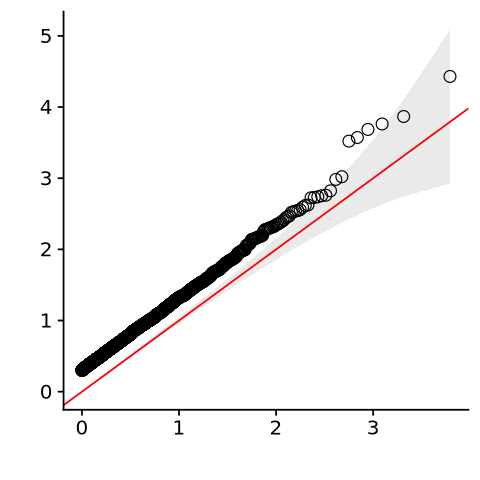

In [3]:
options(repr.plot.height = 4, repr.plot.width = 4)

df <- read.csv('../../results/04_statistical_calibration/output/MoranI/32_10x_Xenium_Human_Colon_Cancer.csv')
p <- gg_qqplot(df$pval_norm)

print(p)

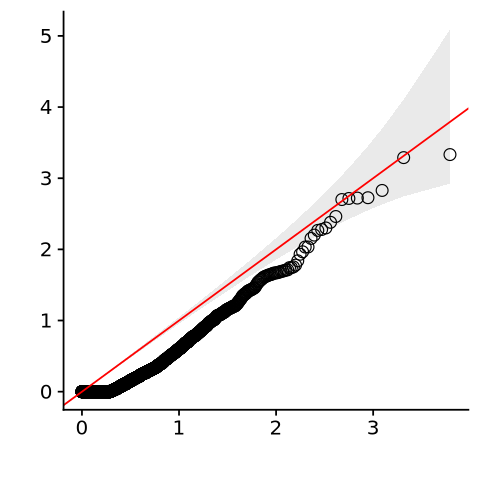

In [4]:
df <- read.csv('../../results/04_statistical_calibration/output/nnSVG/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$pval)

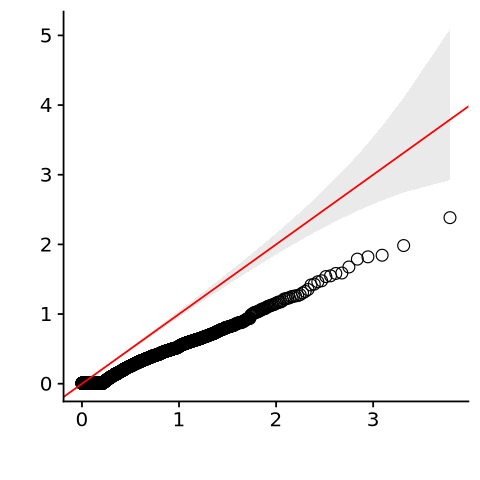

In [5]:
df <- read.csv('../../results/04_statistical_calibration/output/SOMDE/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$pval)

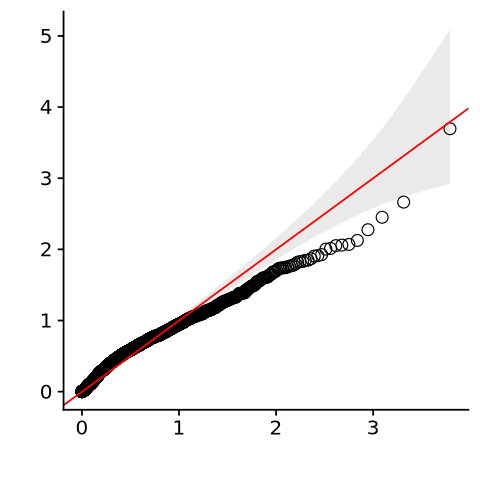

In [6]:
df <- read.csv('../../results/04_statistical_calibration/output/SPARK-X/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$combinedPval)

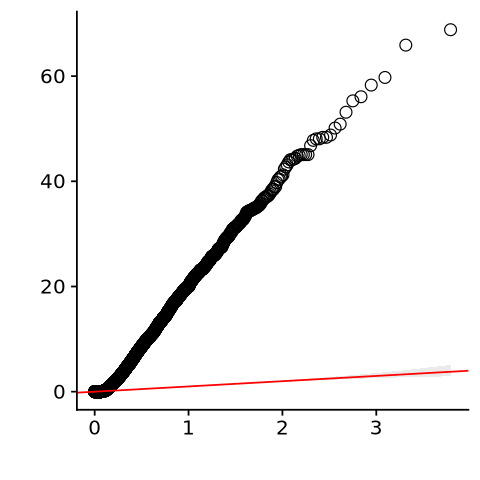

In [7]:
df <- read.csv('../../results/04_statistical_calibration/output/SpaGFT/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$pvalue)

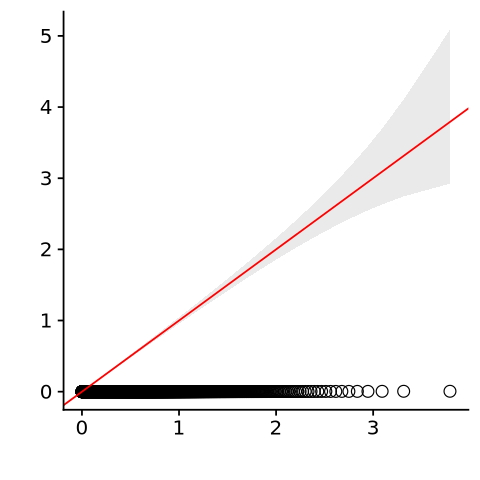

In [8]:
df <- read.csv('../../results/04_statistical_calibration/output/Spanve/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$pvals)

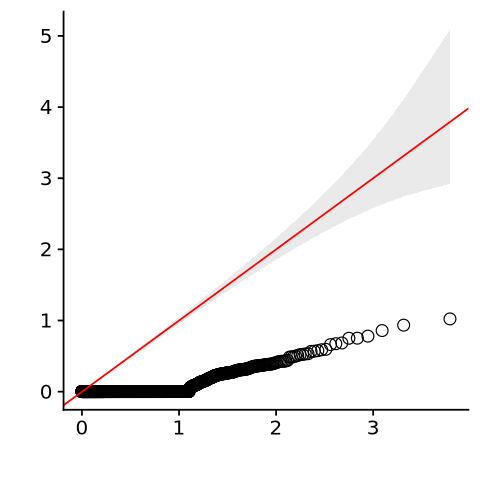

In [9]:
df <- read.csv('../../results/04_statistical_calibration/output/SpatialDE/32_10x_Xenium_Human_Colon_Cancer.csv')
gg_qqplot(df$pval)